# Decision Trees 

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The dataset used here is Drug prediction based on the health parameters of a patient. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

In [4]:
df = pd.read_csv("Drug_data.csv")
df.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   200 non-null    int64  
 1   Age          200 non-null    int64  
 2   Sex          200 non-null    object 
 3   BP           200 non-null    object 
 4   Cholesterol  200 non-null    object 
 5   Na_to_K      200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [7]:
#cOnverting categorical variables into numerical encoding
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["BP"] = label_encoder.fit_transform(df["BP"])
df["Cholesterol"] = label_encoder.fit_transform(df["Cholesterol"])
df.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,0,0,0,25.355,drugY
1,1,47,1,1,0,13.093,drugC
2,2,47,1,1,0,10.114,drugC
3,3,28,0,2,0,7.798,drugX
4,4,61,0,1,0,18.043,drugY


In [10]:
df.isnull().sum()

Unnamed: 0     0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
custom_map = {"drugA": 0, "drugB":1, "drugC":2, "drugX":3, "drugY":4}
df["Drug_num"] = df["Drug"].map(custom_map)
df.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,0,23,0,0,0,25.355,drugY,4
1,1,47,1,1,0,13.093,drugC,2
2,2,47,1,1,0,10.114,drugC,2
3,3,28,0,2,0,7.798,drugX,3
4,4,61,0,1,0,18.043,drugY,4


In [21]:
#FInding coorelation with target variable
df.drop("Drug", axis = 1).corr()["Drug_num"].sort_values(ascending=False)

Drug_num       1.000000
Na_to_K        0.589120
BP             0.372868
Cholesterol    0.055629
Age           -0.004828
Unnamed: 0    -0.088400
Sex           -0.098573
Name: Drug_num, dtype: float64

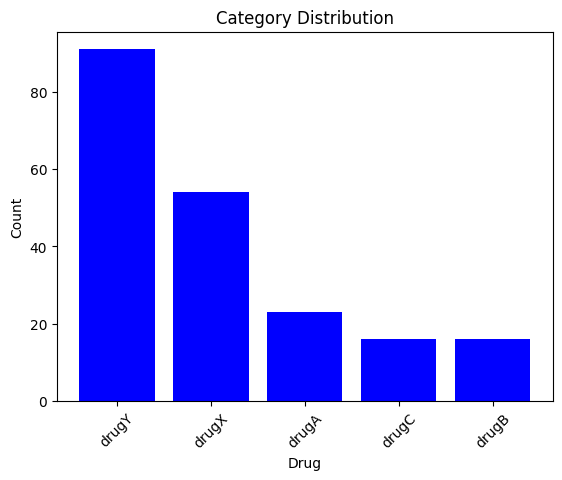

In [27]:
category_counts = df['Drug'].value_counts()

plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45) 
plt.show()

In [56]:
Y = df["Drug_num"]
X = df.drop(["Drug","Drug_num"], axis = 1)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 32)

In [70]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [71]:
drugTree.fit(X_train,Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
tree_predictions = drugTree.predict(X_test)

In [73]:
print("Decision Trees's Accuracy on Test set: ", metrics.accuracy_score(Y_test, tree_predictions))

Decision Trees's Accuracy on Test set:  0.9875


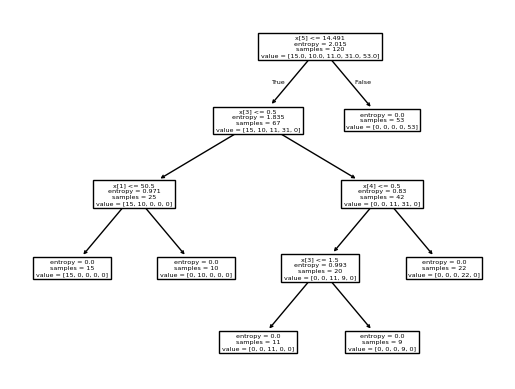

In [74]:
plot_tree(drugTree)
plt.show()

In [ ]:
## a